# Classifying CIFAR10 Dataset Using KNN Algorithm

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import math 

# Loading Train Data

In [5]:
DATA_DIR= r'C:\Users\Asus\Documents\CVPR\CIFAR10\train'
CATEGORIES=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

train_data=[]

for c in CATEGORIES:
    path=os.path.join(DATA_DIR,c)
    class_num=CATEGORIES.index(c) 
    
    
    for img in tqdm(os.listdir(path)):
        try:
            img_array=cv2.imread(os.path.join(path,img))
            train_data.append([img_array,class_num]) 
        except Exception as e:  
            pass
            
print(len(train_data))

100%|████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:00<00:00, 8273.30it/s]

50000


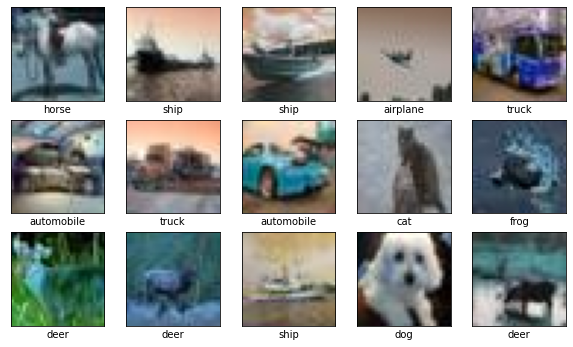

In [6]:
import random
random.shuffle(train_data)

plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_data[i][0])
    plt.xlabel(CATEGORIES[train_data[i][1]])
plt.show()

# Loading Test Data

In [7]:
DATA_DIR= r'C:\Users\Asus\Documents\CVPR\CIFAR10\test'
CATEGORIES=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

test_data=[]

for c in CATEGORIES:
    path=os.path.join(DATA_DIR,c)
    class_num=CATEGORIES.index(c) 
    
    
    for img in tqdm(os.listdir(path)):
        try:
            img_array=cv2.imread(os.path.join(path,img))
            
            test_data.append([img_array,class_num]) 
        except Exception as e:  
            pass
            
print(len(test_data))

100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 8086.08it/s]

10000


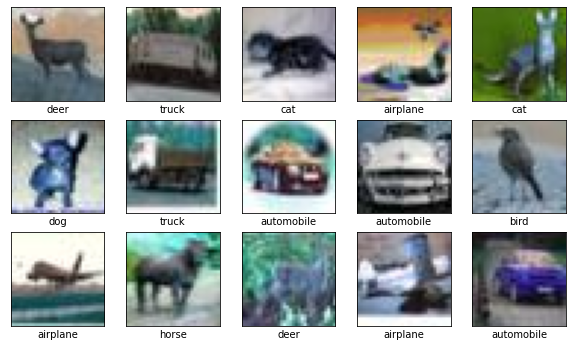

In [8]:
import random
random.shuffle(test_data)

plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_data[i][0])
    plt.xlabel(CATEGORIES[test_data[i][1]])
plt.show()

# KNN - Manhanttan Distance Calculation

In [9]:
def l1_distance(test,k):    
    x=[]

    for i in range(0,len(train_data)):
        x.append(np.sum(abs(np.subtract(train_data[i][0].flatten(),test.flatten()))))

    for j in (np.argsort(x)[:k]):
        for i in (range(0,len(train_data))):
            if np.sum(abs(np.subtract(train_data[i][0].flatten(),test.flatten())))==x[j]:
                print(CATEGORIES[train_data[i][1]])
                break

# Prediction on a single test image

In [10]:
def l1_distance_accuracy(test,k):    
    x=[]
    prediction_array = []
    for i in range(0,len(train_data)):
        x.append(np.sum(abs(np.subtract(train_data[i][0].flatten(),test.flatten()))))

    for j in (np.argsort(x)[:k]):
        for i in (range(0,len(train_data))): #for i in tqdm(range(0,len(train_data))):
            if np.sum(abs(np.subtract(train_data[i][0].flatten(),test.flatten())))==x[j]:
                #print(CATEGORIES[train_data[i][1]])
                prediction_array.append(train_data[i][1])
                break

    #print(prediction_array)
    
    check = []
    for i in range(0, len(CATEGORIES)):
        a = 0
        for j in range(0, k):
            if i == prediction_array[j]:
                a = a+1
        check.append(a)
            
    for final_prediction in range(0,len(CATEGORIES)):
        if check[final_prediction] == max(check):
            #print('Prediction : ' +CATEGORIES[final_prediction])
            return final_prediction

In [17]:
Single_Prediction = l1_distance_accuracy(test_data[1036][0],5)    #K =5
print('Prediction : ' + CATEGORIES[Single_Prediction])
print('Correct :' + CATEGORIES[test_data[1036][1]])

Prediction : automobile
Correct :automobile


Text(0.5, 0, 'automobile')

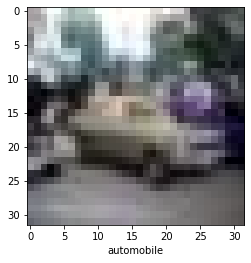

In [18]:
plt.imshow(test_data[1036][0],cmap=plt.cm.gray)
plt.xlabel(CATEGORIES[test_data[1036][1]])

# Accuracy for Different K values (K = 20)

In [19]:
def single_accuracy(k, test_data_number):
    print('Calculating...   (k = '+str(k)+')')
    accuracy_count = 0
    for j in tqdm(range(0, test_data_number)): #for j in range(0, len(test_data)):
        #print('------------')
        if l1_distance_accuracy(test_data[j][0], k) == test_data[j][1]:
            accuracy_count = accuracy_count + 1
            #print('CORRECT PREDICTION COUNT = ' + str(accuracy_count))
            
        
        #print('Correct : ' + CATEGORIES[test_data[j][1]])
        #print('------------')

    accuracy = (accuracy_count*100)/(j+1) #accuracy = (accuracy_count*100)/len(test_data)
    
    print('-------------------------------------------------------')
    print('\t\tAccuracy when k = '+ str(k) +' is '+ str(accuracy))
    print('-------------------------------------------------------')
    
    return accuracy

In [20]:
k = 20

accuracy_array = []

for i in range(0, k):  
    accuracy_array.append(single_accuracy(i+1, len(test_data)))

  0%|                                                                                        | 0/10000 [00:00<?, ?it/s]

Calculating...   (k = 1)


 24%|██████████████████                                                         | 2400/10000 [54:16<2:51:51,  1.36s/it]


KeyboardInterrupt: 

In [ ]:
print(accuracy_array)

In [ ]:
k_array = list(range(1, k+1))
print(k_array)

# Plotting Accuracy (%) VS K Graph

In [ ]:
plt.xlabel('Values of K')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy (%) VS K Graph')
plt.plot(k_array, accuracy_array)